<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/Clustering_(DBSCAN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DBSCAN

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN is a powerful clustering algorithm that groups together points that are closely packed together, marking as outliers points that lie alone in low-density regions. Unlike K-Means, it does not require specifying the number of clusters beforehand and can find arbitrarily shaped clusters.

#### Key Concepts:

1.  **Epsilon (ε) or `eps`**: This is a radius that defines a neighborhood around a data point. Two points are considered neighbors if the distance between them is less than or equal to `eps`.

2.  **Minimum Points (`min_samples`)**: This is the minimum number of data points required to form a dense region (a cluster). If a point has `min_samples` (including itself) within its `eps` neighborhood, it's considered a "core point."

3.  **Core Point**: A data point that has at least `min_samples` (including itself) within its `eps` neighborhood. Core points are at the interior of a cluster.

4.  **Border Point**: A data point that is within the `eps` neighborhood of a core point but does not have `min_samples` within its own `eps` neighborhood. Border points are on the edge of a cluster.

5.  **Noise Point (or Outlier)**: A data point that is neither a core point nor a border point. These points are considered outliers.

#### How DBSCAN Works:

1.  **Start with an arbitrary unvisited data point.**
2.  **Retrieve its `eps` neighborhood.**
3.  **If the neighborhood contains at least `min_samples` points,** mark the current point as a **core point** and create a new cluster. Add all points in its `eps` neighborhood to this cluster. Then, recursively expand the cluster by visiting all directly reachable points (other core points within `eps` of existing core points).
4.  **If the neighborhood contains fewer than `min_samples` points,** mark the current point as **noise** (it might later be identified as a border point if it falls within the `eps` neighborhood of a core point).
5.  **Repeat the process** for all unvisited points. Points that are eventually added to a cluster but are not core points themselves are classified as **border points**.

#### Advantages of DBSCAN:

*   **Doesn't require specifying the number of clusters**: It discovers the number of clusters based on the data's density.
*   **Can find arbitrarily shaped clusters**: Unlike K-Means, which assumes spherical clusters.
*   **Identifies outliers**: It naturally distinguishes noise points.
*   **Robust to outliers**: Since it explicitly marks outliers, they don't significantly affect cluster formation.

#### Disadvantages of DBSCAN:

*   **Sensitive to parameter selection**: Choosing appropriate `eps` and `min_samples` can be challenging, especially with varying densities.
*   **Difficulty with varying densities**: If clusters have significantly different densities, a single set of `eps` and `min_samples` might not work well for all clusters.
*   **Difficulty with high-dimensional data**: The concept of density becomes less meaningful in very high-dimensional spaces (curse of dimensionality).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons, make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data
# We'll create two datasets: one with moons-like clusters and one with blobs.

# Dataset 1: Moons (good for demonstrating non-linear clusters)
X1, y1 = make_moons(n_samples=200, noise=0.05, random_state=42)

# Dataset 2: Blobs with some noise (good for demonstrating density-based clustering)
X2, y2 = make_blobs(n_samples=200, centers=[[0,0], [3,3], [-3,3]], cluster_std=[0.5, 0.5, 0.5], random_state=42)

# Add some additional noise points for X2
rng = np.random.RandomState(42)
X2 = np.concatenate([X2, rng.uniform(low=-5, high=5, size=(20, 2))])
y2 = np.concatenate([y2, -np.ones(20, dtype=int)]) # Assign noise a label of -1

# Scale the data for better performance of DBSCAN (though not strictly necessary for simple cases)
X1_scaled = StandardScaler().fit_transform(X1)
X2_scaled = StandardScaler().fit_transform(X2)

print("Sample data generated.")

Sample data generated.


### Applying DBSCAN to the Moons dataset

For the `make_moons` dataset, we expect DBSCAN to find two crescent-shaped clusters.

Estimated number of clusters (Moons): 2
Estimated number of noise points (Moons): 1


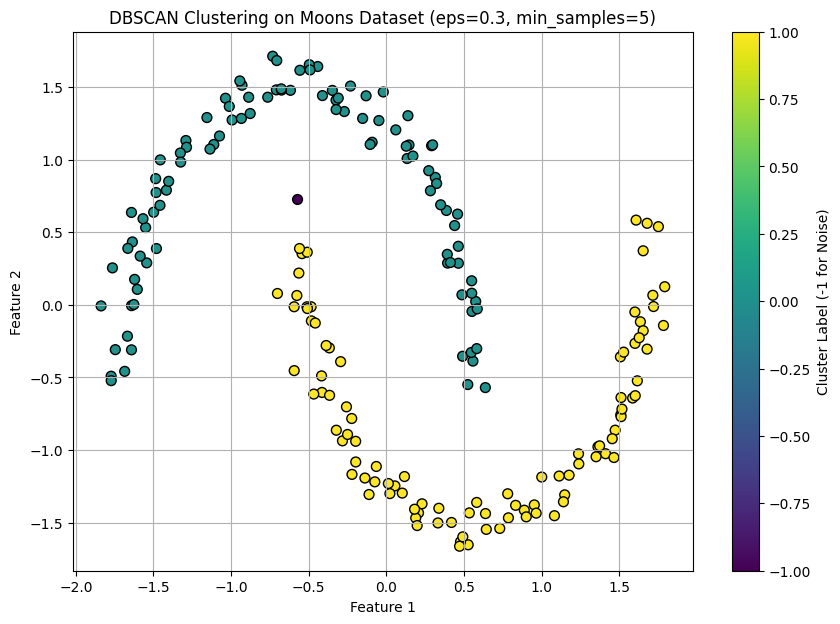

In [2]:
# DBSCAN for Moons dataset
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.

dbscan_moons = DBSCAN(eps=0.3, min_samples=5)
clusters_moons = dbscan_moons.fit_predict(X1_scaled)

# Number of clusters in labels, ignoring noise if present.
n_clusters_moons = len(set(clusters_moons)) - (1 if -1 in clusters_moons else 0)
n_noise_moons = list(clusters_moons).count(-1)

print(f"Estimated number of clusters (Moons): {n_clusters_moons}")
print(f"Estimated number of noise points (Moons): {n_noise_moons}")

# Plotting the results for Moons
plt.figure(figsize=(10, 7))
plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c=clusters_moons, cmap='viridis', s=50, edgecolors='k')
plt.title('DBSCAN Clustering on Moons Dataset (eps=0.3, min_samples=5)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label (-1 for Noise)')
plt.grid(True)
plt.show()


### Applying DBSCAN to the Blobs dataset

For the `make_blobs` dataset with added noise, we expect DBSCAN to identify the three distinct blobs and mark the scattered points as noise.

Estimated number of clusters (Blobs): 3
Estimated number of noise points (Blobs): 12


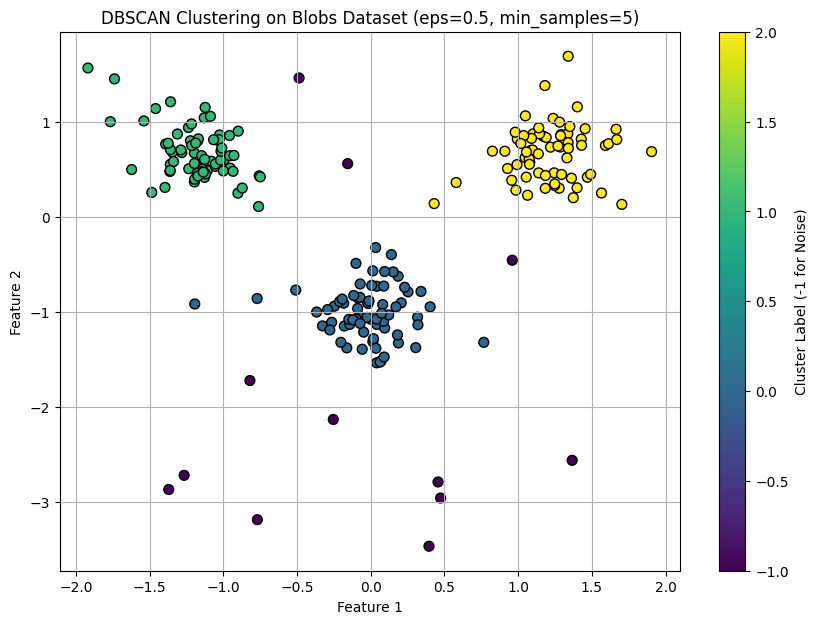

In [3]:
# DBSCAN for Blobs dataset
dbscan_blobs = DBSCAN(eps=0.5, min_samples=5)
clusters_blobs = dbscan_blobs.fit_predict(X2_scaled)

n_clusters_blobs = len(set(clusters_blobs)) - (1 if -1 in clusters_blobs else 0)
n_noise_blobs = list(clusters_blobs).count(-1)

print(f"Estimated number of clusters (Blobs): {n_clusters_blobs}")
print(f"Estimated number of noise points (Blobs): {n_noise_blobs}")

# Plotting the results for Blobs
plt.figure(figsize=(10, 7))
plt.scatter(X2_scaled[:, 0], X2_scaled[:, 1], c=clusters_blobs, cmap='viridis', s=50, edgecolors='k')
plt.title('DBSCAN Clustering on Blobs Dataset (eps=0.5, min_samples=5)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label (-1 for Noise)')
plt.grid(True)
plt.show()


##📍 DBSCAN in Google Maps – City Detection from GPS Data

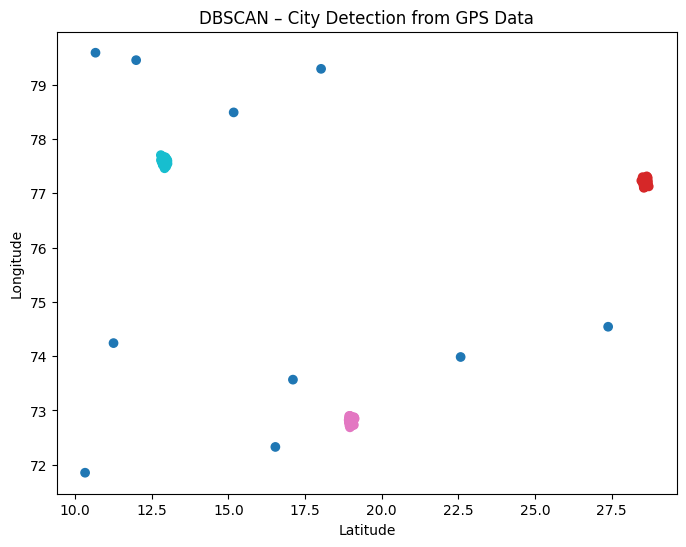

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Simulated GPS points for 3 cities
np.random.seed(0)

# Delhi cluster
delhi = np.random.normal(loc=[28.6, 77.2], scale=0.05, size=(50, 2))
# Mumbai cluster
mumbai = np.random.normal(loc=[19.0, 72.8], scale=0.05, size=(50, 2))
# Bangalore cluster
bangalore = np.random.normal(loc=[12.9, 77.6], scale=0.05, size=(50, 2))
# Noise (random points)
noise = np.random.uniform(low=[10,70], high=[30,80], size=(10,2))

X = np.vstack((delhi, mumbai, bangalore, noise))

# Apply DBSCAN
db = DBSCAN(eps=0.1, min_samples=5)
labels = db.fit_predict(X)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab10')
plt.title("DBSCAN – City Detection from GPS Data")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()


#E-commerce – Customer Location Clustering 🛒

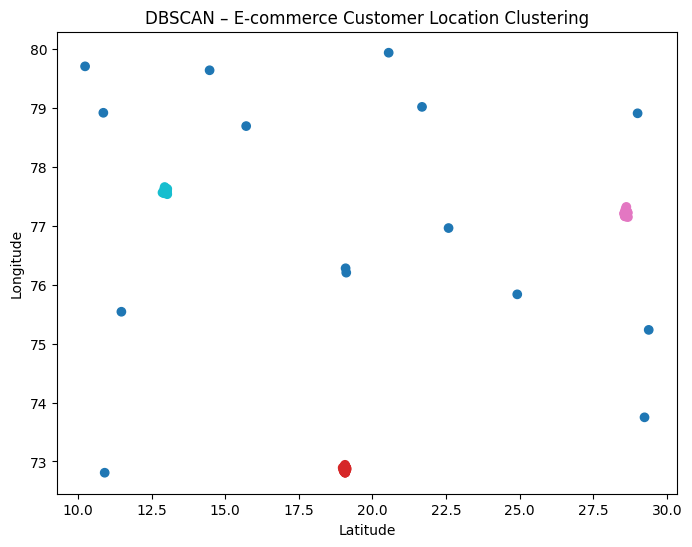

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# -----------------------------
# Simulate Customer Locations
# -----------------------------
np.random.seed(42)

# Mumbai customers
mumbai = np.random.normal(loc=[19.07, 72.87], scale=0.03, size=(60, 2))

# Delhi customers
delhi = np.random.normal(loc=[28.61, 77.20], scale=0.03, size=(60, 2))

# Bangalore customers
bangalore = np.random.normal(loc=[12.97, 77.59], scale=0.03, size=(60, 2))

# Sparse rural customers (noise)
rural = np.random.uniform(low=[10,70], high=[30,80], size=(15,2))

# Combine all customers
X = np.vstack((mumbai, delhi, bangalore, rural))

# -----------------------------
# Apply DBSCAN
# -----------------------------
dbscan = DBSCAN(eps=0.08, min_samples=10)
labels = dbscan.fit_predict(X)

# -----------------------------
# Plot Result
# -----------------------------
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab10')
plt.title("DBSCAN – E-commerce Customer Location Clustering")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()


### How `eps` and `min_samples` Affect DBSCAN Clustering

The `eps` (epsilon) and `min_samples` parameters are fundamental to how DBSCAN defines clusters and noise. Here's how they affect the clustering:

#### Impact of `eps` (Epsilon - Neighborhood Radius)

*   **Definition**: `eps` defines the maximum distance between two samples for one to be considered as in the neighborhood of the other. It's the radius around a point to search for neighbors.

*   **Increasing `eps`**:
    *   **Larger neighborhoods**: Each point's neighborhood expands.
    *   **Clusters merge**: Points that were previously considered separate may now fall within each other's `eps` neighborhood, causing clusters to merge.
    *   **Fewer clusters**: Generally leads to a smaller number of larger clusters.
    *   **Fewer noise points**: More points are likely to be absorbed into clusters or become core/border points, reducing the number of points classified as noise.
    *   **Risk of over-clustering**: If `eps` is too large, distinct clusters might merge into one large cluster, losing fine-grained structure.

*   **Decreasing `eps`**:
    *   **Smaller neighborhoods**: Each point's neighborhood shrinks.
    *   **Clusters split**: Existing clusters may break into smaller clusters or individual points.
    *   **More clusters**: Generally leads to a larger number of smaller clusters.
    *   **More noise points**: Points might no longer have enough neighbors within the smaller `eps` radius to be part of a cluster, thus being classified as noise.
    *   **Risk of under-clustering**: If `eps` is too small, even naturally dense clusters might be fragmented or classified as noise.

#### Impact of `min_samples` (Minimum Samples - Density Threshold)

*   **Definition**: `min_samples` is the number of samples (or total weight) in a neighborhood for a point to be considered a **core point**. This essentially sets the density threshold for forming a cluster.

*   **Increasing `min_samples`**:
    *   **Higher density requirement**: More points are needed within an `eps` radius for a point to be considered a core point.
    *   **Fewer core points**: Fewer points will meet the criterion to be core points.
    *   **Fewer clusters**: This can lead to fewer and denser clusters, as only the most compact regions will form clusters.
    *   **More noise points**: Points that were previously border points or part of less dense clusters might now be classified as noise because their neighborhoods don't meet the higher `min_samples` threshold.
    *   **Robustness to noise**: Makes the algorithm more robust to noise, as isolated points or sparse regions are less likely to form clusters.

*   **Decreasing `min_samples`**:
    *   **Lower density requirement**: Fewer points are needed within an `eps` radius for a point to be a core point.
    *   **More core points**: More points will qualify as core points.
    *   **More clusters**: Can lead to more and potentially sparser clusters, as even less dense regions might be recognized as clusters.
    *   **Fewer noise points**: More points are likely to be included in clusters, reducing the number of noise points.
    *   **Sensitivity to noise**: Makes the algorithm more sensitive to noise, as random fluctuations in data density might be identified as small clusters.

#### Interplay between `eps` and `min_samples`

These two parameters are not independent; they work together. A larger `eps` generally requires a larger `min_samples` to maintain a similar density perception, and vice versa. Finding the optimal values often involves experimentation and domain knowledge, especially for datasets with varying densities.

*   For example, if `eps` is large, but `min_samples` is also large, the algorithm still requires a high number of points in that large radius to form a cluster, keeping the density requirement high.
*   If `eps` is small and `min_samples` is also small, it will find very tiny, dense clusters, and most other points will be noise.